In [15]:
from Learning_Agent import *
from GP import *
from GPUCB import *
from GPTS import *
from GPUCB_Handler import *
from GPTS_Handler import *
import Functions as f
from Enviroment import *
from Clairvoyant import *
from Class import *
import Plots as p
import warnings
warnings.filterwarnings("ignore")  # Convergence warning concerning the parameters of the GP since we are working with very large values


In [16]:
pricing_arms=[10,15,20,25,30]
advertising_arms=range(100,400,3)
sigma = 10

In [17]:
cl=Class()
env=Enviroment(5,100,cl)

In [18]:

runs=10
T=365
show_print=False

cum_regret_gpucb_multi=[]
cum_reward_gpucb_multi=[]
istant_regret_gpucb_multi=[]
istant_reward_gpucb_multi=[]




for r in range(runs):

    gpucb=GPUCB_Handler(advertising_arms)

    clairv_price=Clairvoyant_pricing(env , (1,1) ,pricing_arms)
    clairv_bid=Clairvoyant_bid(env,(1,1), advertising_arms)

    opt_price=clairv_price.optimal_arm()

    opt_bid=clairv_bid.optimal_arm(opt_price)

    expected_optimal_rew=clairv_bid.expected_reward(opt_bid,opt_price)


    if show_print:
        print(opt_price)
        print(opt_bid)
        print(expected_optimal_rew)


    cum_reward_GPUCB=[0]



    clairvoyant_cum_reward=[0]
    cumulative_optimal_rew=[0]

    cum_regret_GPUCB=[]

    regret_GPUCB=np.zeros(T)+expected_optimal_rew

    reward_GPUCB=[]



    for t in range(T):
        cumulative_optimal_rew.append(cumulative_optimal_rew[t]+expected_optimal_rew)

        pulled_arm_GPUCB=gpucb.pull_arm(opt_price)
        rewards_GPUCB=env.round(opt_price, pulled_arm_GPUCB)
        gpucb.update(pulled_arm_GPUCB ,rewards_GPUCB )

        cum_reward_GPUCB.append(cum_reward_GPUCB[t]+rewards_GPUCB[3])
        cum_regret_GPUCB.append(cumulative_optimal_rew[t+1]-cum_reward_GPUCB[t+1])
        regret_GPUCB[t]=regret_GPUCB[t]-rewards_GPUCB[3]
        reward_GPUCB.append(rewards_GPUCB[3])
        
       



  

    cum_regret_gpucb_multi.append(cum_regret_GPUCB)
    cum_reward_gpucb_multi.append(cum_reward_GPUCB)
    istant_regret_gpucb_multi.append(regret_GPUCB)
    istant_reward_gpucb_multi.append(reward_GPUCB)


In [19]:
runs=10
T=365
show_print=False

cum_regret_gpts_multi=[]
cum_reward_gpts_multi=[]
istant_regret_gpts_multi=[]
istant_reward_gpts_multi=[]




for r in range(runs):

    gpts=GPTS_Handler(advertising_arms)

    clairv_price=Clairvoyant_pricing(env , (1,1) ,pricing_arms)
    clairv_bid=Clairvoyant_bid(env,(1,1), advertising_arms)

    opt_price=clairv_price.optimal_arm()

    opt_bid=clairv_bid.optimal_arm(opt_price)

    expected_optimal_rew=clairv_bid.expected_reward(opt_bid,opt_price)


    if show_print:
        print(opt_price)
        print(opt_bid)
        print(expected_optimal_rew)


    cum_reward_GPTS=[0]



    clairvoyant_cum_reward=[0]
    cumulative_optimal_rew=[0]

    cum_regret_GPTS=[]

    regret_GPTS=np.zeros(T)+expected_optimal_rew

    reward_GPTS=[]



    for t in range(T):
        cumulative_optimal_rew.append(cumulative_optimal_rew[t]+expected_optimal_rew)

        pulled_arm_GPTS=gpts.pull_arm(opt_price)
        rewards_GPTS=env.round(opt_price, pulled_arm_GPTS)
        gpts.update(pulled_arm_GPTS ,rewards_GPTS )

        cum_reward_GPTS.append(cum_reward_GPTS[t]+rewards_GPTS[3])
        cum_regret_GPTS.append(cumulative_optimal_rew[t+1]-cum_reward_GPTS[t+1])
        regret_GPTS[t]=regret_GPTS[t]-rewards_GPTS[3]
        reward_GPTS.append(rewards_GPTS[3])
        
        print(opt_bid,pulled_arm_GPTS)



  

    cum_regret_gpts_multi.append(cum_regret_GPTS)
    cum_reward_gpts_multi.append(cum_reward_GPTS)
    istant_regret_gpts_multi.append(regret_GPTS)
    istant_reward_gpts_multi.append(reward_GPTS)

 

253 286
253 286
253 286
253 286
253 286
253 283
253 265
253 301
253 178
253 229
253 343
253 112
253 328
253 244
253 340
253 223
253 253
253 370
253 298
253 274
253 289
253 247
253 142
253 202
253 295
253 256
253 259
253 235
253 292
253 250
253 280
253 241
253 256
253 229
253 310
253 274
253 259
253 211
253 244
253 220
253 304
253 220
253 259
253 280
253 223
253 322
253 253
253 280
253 268
253 274
253 232
253 241
253 256
253 268
253 277
253 235
253 244
253 238
253 244
253 238
253 268
253 229
253 244
253 244
253 244
253 235
253 268
253 256
253 274
253 205
253 265
253 256
253 220
253 244
253 220
253 316
253 286
253 262
253 286
253 214
253 250
253 277
253 268
253 274
253 289
253 211
253 286
253 277
253 250
253 283
253 256
253 289
253 244
253 241
253 229
253 220
253 232
253 244
253 280
253 265
253 256
253 256
253 235
253 256
253 220
253 259
253 310
253 277
253 256
253 247
253 310
253 271
253 229
253 274
253 220
253 274
253 241
253 262
253 247
253 286
253 256
253 226
253 175
253 262
253 265


253 229
253 262
253 229
253 259
253 253
253 241
253 244
253 253
253 253
253 262
253 274
253 253
253 253
253 250
253 244
253 262
253 250
253 238
253 250
253 256
253 271
253 250
253 259
253 244
253 250
253 253
253 250
253 244
253 265
253 268
253 256
253 241
253 235
253 250
253 250
253 250
253 277
253 253
253 262
253 250
253 262
253 235
253 265
253 226
253 226
253 268
253 253
253 250
253 265
253 250
253 232
253 256
253 241
253 277
253 241
253 244
253 229
253 256
253 268
253 262
253 262
253 232
253 274
253 253
253 229
253 229
253 256
253 235
253 244
253 271
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 391
253 397
253 391
253 364
253 118
253 154
253 217
253 376
253 115
253 166
253 178
253 208
253 109
253 124
253 106
253 109
253 163
253 109
253 250
253 202
253 151
253 127
253 208
253 172
253 250
253 259
253 202
253 220
253 217
253 232
253 274
253 265


253 256
253 265
253 247
253 259
253 241
253 238
253 271
253 247
253 244
253 262
253 280
253 244
253 232
253 253
253 256
253 229
253 247
253 247
253 262
253 271
253 259
253 262
253 265
253 241
253 265
253 241
253 265
253 241
253 259
253 271
253 244
253 253
253 244
253 244
253 268
253 265
253 244
253 256
253 283
253 241
253 277
253 274
253 241
253 253
253 244
253 256
253 244
253 232
253 286
253 238
253 262
253 244
253 235
253 283
253 262
253 271
253 250
253 265
253 268
253 253
253 274
253 271
253 271
253 253
253 277
253 253
253 226
253 265
253 268
253 247
253 256
253 256
253 223
253 235
253 274
253 259
253 262
253 241
253 229
253 274
253 265
253 262
253 238
253 277
253 232
253 256
253 247
253 259
253 268
253 256
253 268
253 283
253 238
253 241
253 256
253 280
253 247
253 247
253 283
253 241
253 250
253 268
253 235
253 250
253 244
253 280
253 259
253 292
253 241
253 250
253 262
253 253
253 247
253 292
253 265
253 274
253 244
253 241
253 235
253 259
253 277
253 262
253 253
253 265
253 259


253 289
253 247
253 265
253 277
253 268
253 259
253 232
253 262
253 262
253 232
253 247
253 262
253 253
253 307
253 256
253 238
253 268
253 271
253 214
253 280
253 265
253 256
253 211
253 265
253 268
253 253
253 259
253 253
253 268
253 256
253 286
253 244
253 241
253 241
253 253
253 259
253 262
253 244
253 271
253 241
253 244
253 280
253 271
253 259
253 235
253 241
253 250
253 259
253 226
253 271
253 247
253 238
253 265
253 247
253 232
253 202
253 241
253 250
253 238
253 265
253 259
253 265
253 253
253 259
253 268
253 262
253 244
253 253
253 220
253 286
253 277
253 235
253 241
253 232
253 265
253 259
253 265
253 268
253 274
253 262
253 232
253 247
253 244
253 256
253 289
253 256
253 250
253 241
253 259
253 253
253 253
253 277
253 256
253 277
253 247
253 250
253 259
253 241
253 277
253 250
253 259
253 244
253 253
253 238
253 274
253 247
253 271
253 256
253 241
253 268
253 265
253 280
253 256
253 265
253 247
253 232
253 247
253 265
253 256
253 244
253 286
253 232
253 235
253 256
253 253


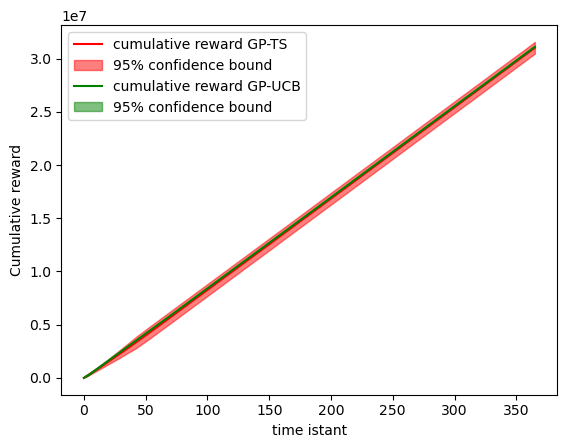

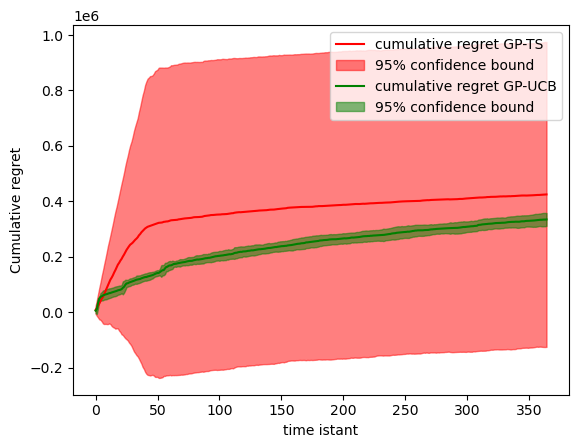

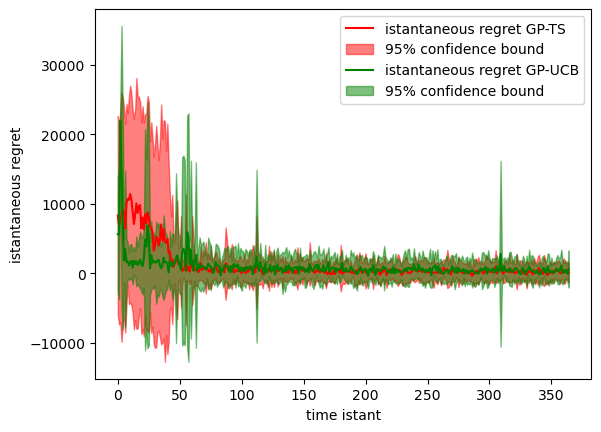

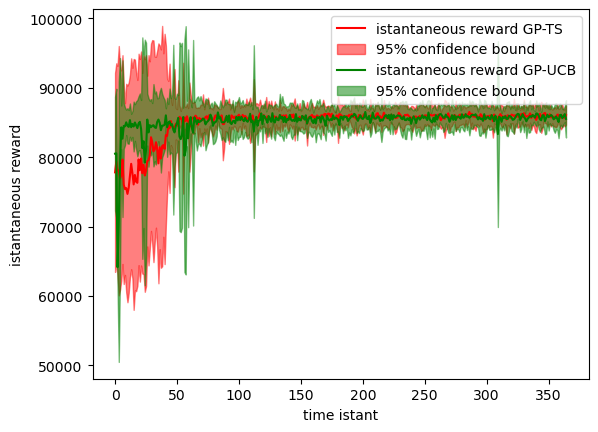

In [21]:
x=[i for i in range(T+1)]
arr1=np.array(cum_reward_gpts_multi)
arr2=np.array(cum_reward_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"cumulative reward GP-TS", "cumulative reward GP-UCB","Cumulative reward")

x=[i for i in range(T)]
arr1=np.array(cum_regret_gpts_multi)
arr2=np.array(cum_regret_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"cumulative regret GP-TS", "cumulative regret GP-UCB","Cumulative regret")

x=[i for i in range(T)]
arr1=np.array(istant_regret_gpts_multi)
arr2=np.array(istant_regret_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"istantaneous regret GP-TS", "istantaneous regret GP-UCB","istantaneous regret")

x=[i for i in range(T)]
arr1=np.array(istant_reward_gpts_multi)
arr2=np.array(istant_reward_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"istantaneous reward GP-TS", "istantaneous reward GP-UCB","istantaneous reward")

